In [1]:
import pandas as pd
import numpy as np

In [133]:
df_all = pd.read_csv("D:\\datapool\\cs-training.csv")

df_all["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_U"] = df_all["SeriousDlqin2yrs"]
df_all.loc[df_all["test_cat1"] == "0_test","test_cat1"] = np.nan
df_all.loc[df_all["test_cat2"] == "0_test","test_cat2"] = np.nan
df_all.loc[df_all["test_cat3"] == "0_test","test_cat3"] = np.nan


df_train = df_all.sample(frac = 0.7)
df_test = df_all[df_all.index.isin(df_train.index) == False]

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

x_test = df_test.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
#y_column = u'SeriousDlqin2yrs'
y_test = df_test[u'SeriousDlqin2yrs']


In [177]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

ximu.woe_t.head()

FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:84: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,p_yi,woe,iv_i
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0193]",21000,394,20606,0.210237,0.066543,0.056390,-1.315938,0.202453
1,RevolvingUtilizationOfUnsecuredLines,"(0.0193, 0.0836]",21000,338,20662,0.210809,0.066543,0.048376,-1.471957,0.239095
2,RevolvingUtilizationOfUnsecuredLines,"(0.0836, 0.273]",21000,615,20385,0.207983,0.066543,0.088021,-0.859884,0.103153
3,RevolvingUtilizationOfUnsecuredLines,"(0.273, 0.699]",21000,1467,19533,0.199290,0.066543,0.209961,0.052163,0.000557
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",21000,4173,16827,0.171681,0.066543,0.597252,1.246699,0.530559


In [178]:
ximu.get_woe_replaced_df()

<name>.df_woe_replaced, <name>.df_binned available


In [179]:
excluded_columns = ["test_U","NumberOfDependents","test_cat1","test_cat2","NumberRealEstateLoansOrLines"]
ximu.gen_model(excluded_columns = excluded_columns)

Optimization terminated successfully.
         Current function value: 0.447140
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104992
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Sep 2017   Pseudo R-squ.:                 -0.8280
Time:                        15:40:22   Log-Likelihood:                -46950.
converged:                       True   LL-Null:                       -25683.
                                        LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.4773      0.0

In [180]:
#需要变形
df_binned,df_woe_replaced = ximu.get_woe_replaced_df(x_test)

In [181]:
ximu.gen_score()

base_odds:  0.0712864619999
reverse_base_odds:  14.0279089738
base_rt:  20
base_score:  600
p:  28.8539008178
q:  523.795438619
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
count    45000.000000
mean       628.815640
std         48.973535
min        385.765017
25%        617.448802
50%        644.730814
75%        658.639818
max        673.522774
Name: final_score, dtype: float64
<name>.df_scored, <name>.woe_t_scored available


In [182]:
ximu.gen_score(x_test)

base_odds:  0.0712864619999
reverse_base_odds:  14.0279089738
base_rt:  20
base_score:  600
p:  28.8539008178
q:  523.795438619
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
count    45000.000000
mean       628.815640
std         48.973535
min        385.765017
25%        617.448802
50%        644.730814
75%        658.639818
max        673.522774
Name: final_score, dtype: float64


,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,final_score
0,1.142416,3.297677,1.096966,-22.485875,8.170740,16.794612,-19.852378,-0.667117,587.497041
1,2.980959,1.537506,-1.709628,9.410006,8.170740,16.794612,13.692742,-4.452819,646.424118
2,2.980959,-2.723761,0.534781,9.410006,8.170740,16.794612,23.439367,9.367662,667.974366
3,1.945744,3.297677,1.096966,9.410006,8.170740,16.794612,-0.830641,3.876375,643.761479
4,-6.002337,-2.320749,1.096966,9.410006,8.170740,16.794612,13.692742,-2.127424,638.714556
5,1.945744,-2.723761,-1.709628,9.410006,8.170740,16.794612,-19.852378,-4.452819,607.582517
6,1.142416,1.947014,0.034490,9.410006,8.170740,16.794612,23.439367,3.876375,664.815019
7,1.142416,-2.723761,0.034490,9.410006,8.170740,16.794612,23.439367,9.367662,665.635532
8,1.720389,-0.395620,0.034490,-22.485875,8.170740,16.794612,-0.830641,3.876375,606.884470
9,2.980959,1.537506,0.534781,9.410006,8.170740,16.794612,23.439367,3.876375,666.744345


In [149]:
model_columns = ximu.model.exog_names
#print model_columns

y_test_predict = ximu.model_result.predict(df_woe_replaced[model_columns])

In [16]:
woe_t2.head()

,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,p_yi,woe,iv_i,params,score
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",30000,582,29418,0.210168,0.06684,0.058049,-1.286617,0.195718,0.556074,20.643647
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",30000,497,29503,0.210775,0.06684,0.049571,-1.447382,0.233323,0.556074,23.223118
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",30000,877,29123,0.208060,0.06684,0.087473,-0.866502,0.104489,0.556074,13.902940
3,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",30000,2107,27893,0.199273,0.06684,0.210154,0.053164,0.000578,0.556074,-0.853017
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",30000,5963,24037,0.171725,0.06684,0.594754,1.242254,0.525509,0.556074,-19.931860


In [8]:
base_score = 600
base_rt = 20

y_event = ximu.y_event
base_odds = (y_event.sum()+0.0)/(y_event.count()-y_event.sum())
reverse_base_odds = 1/base_odds

p = base_rt/np.log(2)
q = base_score - base_rt*np.log(reverse_base_odds)/np.log(2)

print "base_odds: ",base_odds
print "reverse_base_odds: ",reverse_base_odds
print "base_rt: ",base_rt
print "base_score: ",base_score
print "p: ",p
print "q: ",q

base_odds:  0.0716275879806
reverse_base_odds:  13.961101137
base_rt:  20
base_score:  600
p:  28.8539008178
q:  523.933183423


In [25]:
#生成df_scored

params = ximu.model_result.params
df_params = params.reset_index().rename(columns={"index":"var_name",0:"params"})

woe_t2 = ximu.woe_t.merge(df_params,on="var_name",how="left")
woe_t2["score"] = - woe_t2["params"] * woe_t2["woe"]*p

#woe_t2 为得分概览
#woe_t = ximu.woe_t
df_scored = pd.DataFrame()


for i in ximu.model.exog_names:
    print i 
    df_score_value = woe_t2[woe_t2["var_name"]==i][["var_cat","score"]]
    df_scored[i] = ximu.df_binned.merge(df_score_value,how="left",left_on=i,right_on="var_cat")["score"]
    
df_scored.head()
df_scored["final_score"] = df_scored.sum(axis = 1)+600
print df_scored["final_score"].describe()
df_scored.head()

DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
count    150000.000000
mean        628.346269
std          48.764557
min         387.425550
25%         616.710034
50%         644.505749
75%         657.866426
max         672.899208
Name: final_score, dtype: float64


,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,final_score
0,-5.666137,2.872727,0.012023,-22.244111,7.760784,17.018069,-19.931860,-2.202335,577.619159
1,1.301003,-2.283734,-1.645793,9.280536,7.760784,17.018069,-19.931860,-2.202335,609.296671
2,1.301003,-1.872038,-1.645793,-22.244111,7.760784,-100.378763,-0.853017,-4.429185,477.638880
3,1.301003,-1.872038,0.605807,9.280536,7.760784,17.018069,13.902940,-4.429185,643.567916
4,1.301003,2.872727,1.044740,-22.244111,7.760784,17.018069,-19.931860,-0.648725,587.172627


In [158]:
y_test_predict

0        0.606666
1        0.166736
2        0.086605
3        0.179954
4        0.207223
5        0.434678
6        0.095668
7        0.093236
8        0.440632
9        0.090037
10       0.290246
11       0.240504
12       0.252463
13       0.189176
14       0.132177
15       0.319275
16       0.142111
17       0.447925
18       0.128140
19       0.116344
20       0.990477
21       0.479821
22       0.133936
23       0.374367
24       0.097539
25       0.082060
26       0.369318
27       0.267047
28       0.176143
29       0.395710
           ...   
44970    0.554831
44971    0.347092
44972    0.105065
44973    0.109121
44974    0.091694
44975    0.226755
44976    0.960066
44977    0.678805
44978    0.081233
44979    0.115612
44980    0.268862
44981    0.310996
44982    0.828394
44983    0.186792
44984    0.469398
44985    0.523466
44986    0.117929
44987    0.479948
44988    0.135730
44989    0.696074
44990    0.974767
44991    0.123678
44992    0.390228
44993    0.085272
44994    0

In [159]:

predict_true = pd.DataFrame()
predict_true["true"] = ximu.y_event
predict_true["predict"] = ximu.model_result.fittedvalues

predict_true_test = pd.DataFrame()
predict_true_test["true"] = y_test.reset_index(drop= True)
predict_true_test["predict"] = y_test_predict.reset_index(drop= True)
#predict_true["predict"] = df_scored["final_score"]
predict_true.head()


import sklearn.metrics as skmetric

fpr ,tpr ,thresholds = skmetric.roc_curve(predict_true["true"],predict_true["predict"])
auc =  skmetric.auc(fpr, tpr)

fpr_test ,tpr_test ,thresholds_test = skmetric.roc_curve(predict_true_test["true"],predict_true_test["predict"])
auc_test =  skmetric.auc(fpr_test, tpr_test)

In [183]:
#排序性（提升图示例）
import math as mt
df_scored["score_rank"] = (df_scored["final_score"].rank(pct=True,ascending = False)*10).apply(mt.ceil)
df_test = pd.concat([df_scored["score_rank"],y,df_scored["final_score"]],axis = 1)
df_test_grp = df_test.groupby("score_rank")[y.name].agg([pd.Series.sum,pd.Series.count])
df_test_grp["pos_rt"] = df_test_grp["sum"] / df_test_grp["count"]
df_test_grp_2 = df_test.groupby("score_rank")["final_score"].agg([pd.Series.max,pd.Series.min])
df_test_grp_all = df_test_grp.merge(df_test_grp_2,left_index=True,right_index=True)
df_test_grp_all

,sum,count,pos_rt,max,min
score_rank,,,,,
1.0,59.0,10425.0,0.005659,672.899208,665.124496
2.0,62.0,10598.0,0.005850,665.120863,659.946885
3.0,112.0,10437.0,0.010731,659.937912,655.963984
4.0,128.0,10467.0,0.012229,655.945261,650.801206
5.0,181.0,10464.0,0.017297,650.782774,644.505749
6.0,312.0,10585.0,0.029476,644.491946,634.438530
7.0,440.0,10538.0,0.041754,634.437396,624.510209
8.0,751.0,10460.0,0.071797,624.501771,610.740691
9.0,1232.0,10543.0,0.116855,610.708590,581.075812


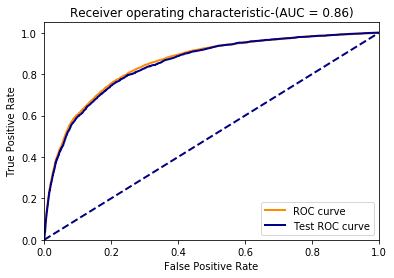

In [161]:
#roc曲线

%matplotlib inline
import matplotlib.pyplot as plt
roc_plot = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot(fpr_test, tpr_test, color='darkblue',
         lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-(AUC = %0.2f)' % auc)
plt.legend(loc="lower right")
#plt.show()

ks_value:  0.553823892591
ks_position 5.0


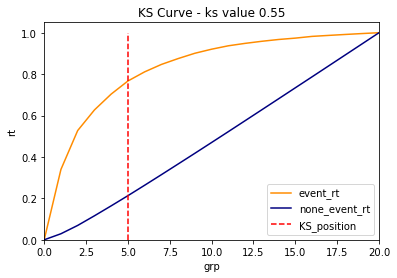

In [58]:
#KS曲线

event_total = y.sum()
non_event_total = y.count() - y.sum()

predict_true["score_rk"] = predict_true["predict"].rank(ascending = False
                                                        ,method = "first")
group_size = round(predict_true.shape[0]/20)
predict_true["rk_group"] = (predict_true["score_rk"]/group_size).apply(np.ceil)

test_grp = predict_true.groupby("rk_group")["true"].agg([np.sum,pd.Series.count])\
            .rename(columns = {"sum":"event_cnt","count":"total_cnt"})\
            .reset_index()
test_grp["non_event_cnt"] = test_grp["total_cnt"] - test_grp["event_cnt"]
test_grp["event_cnt_cum"] = test_grp["event_cnt"].cumsum()
test_grp["non_event_cnt_cum"] = test_grp["non_event_cnt"].cumsum()

test_grp["event_rt"] = test_grp["event_cnt_cum"] / event_total
test_grp["none_event_rt"] = test_grp["non_event_cnt_cum"] / non_event_total

test_grp["ks_value"] = test_grp["event_rt"] - test_grp["none_event_rt"]

ks_value = test_grp["ks_value"].max()
ks_position = test_grp[test_grp["ks_value"]==ks_value]["rk_group"].iloc[0]
print "ks_value: ",ks_value
print "ks_position",ks_position

test_grp_2 = pd.DataFrame({
    "rk_group":[0],
    "event_rt":[0],
    "none_event_rt":[0]}
).append(test_grp)

plt.plot(test_grp_2["rk_group"],test_grp_2["event_rt"],color = "darkorange")
plt.plot(test_grp_2["rk_group"],test_grp_2["none_event_rt"],color = "navy")
plt.plot([ks_position,ks_position],[0,1],color="red",linestyle = "--",
        label = "KS_position")
plt.xlim([0,20])
plt.ylim([0,1.05])
plt.xlabel("grp")
plt.ylabel("rt")
plt.title("KS Curve - ks value %0.2f" % ks_value)
plt.legend(loc = "lower right")

In [73]:
print ximu.model.score.__doc__


        Logit model score (gradient) vector of the log-likelihood

        Parameters
        ----------
        params: array-like
            The parameters of the model

        Returns
        -------
        score : ndarray, 1-D
            The score vector of the model, i.e. the first derivative of the
            loglikelihood function, evaluated at `params`

        Notes
        -----
        .. math:: \frac{\partial\ln L}{\partial\beta}=\sum_{i=1}^{n}\left(y_{i}-\Lambda_{i}\right)x_{i}
        
